# **PROJECT** #
## ***STOCK PRICE TIMELINE FORECASTING*** ##

### **Company Name: INFOSYS** ###

In [55]:

# Importing Libraries
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima import auto_arima
from pandas import DataFrame
from pandas import Grouper
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
import pickle
from dateutil.relativedelta import relativedelta

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [57]:
# Importing the data from the file 'arima_df_output.csv'
lstm_df = pd.read_csv('lstm_df_output.csv')
lstm_df

,Unnamed: 0,DATE,STOCK_PRICE,Indicator
0,0,03-01-2000,122.480469,train
1,1,04-01-2000,132.110931,train
2,2,05-01-2000,121.542191,train
3,3,06-01-2000,111.819138,train
4,4,07-01-2000,102.873825,train
...,...,...,...,...
5934,5934,07-12-2023,1466.150024,test
5935,5935,08-12-2023,1490.599976,test
5936,5936,11-12-2023,1488.599976,test
5937,5937,12-12-2023,1476.000000,test


In [58]:
# Removing the column 'Unnamed: 0'
lstm_df = lstm_df.drop(['Unnamed: 0'], axis=1)
lstm_df

,DATE,STOCK_PRICE,Indicator
0,03-01-2000,122.480469,train
1,04-01-2000,132.110931,train
2,05-01-2000,121.542191,train
3,06-01-2000,111.819138,train
4,07-01-2000,102.873825,train
...,...,...,...
5934,07-12-2023,1466.150024,test
5935,08-12-2023,1490.599976,test
5936,11-12-2023,1488.599976,test
5937,12-12-2023,1476.000000,test


In [59]:
# Importing the data from the file 'arima_df_output.csv'
latest = pd.read_csv('latest_info.csv')
latest

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-12-11 00:00:00+05:30,1490.000000,1499.000000,1485.099976,1488.599976,69258,0.0,0.0
1,2023-12-12 00:00:00+05:30,1475.000000,1489.949951,1467.500000,1476.000000,374722,0.0,0.0
2,2023-12-13 00:00:00+05:30,1477.199951,1477.250000,1432.650024,1448.900024,251023,0.0,0.0
3,2023-12-14 00:00:00+05:30,1465.650024,1510.000000,1461.250000,1501.250000,331218,0.0,0.0
4,2023-12-15 00:00:00+05:30,1520.099976,1588.500000,1520.099976,1579.250000,843129,0.0,0.0


In [60]:
latest

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-12-11 00:00:00+05:30,1490.000000,1499.000000,1485.099976,1488.599976,69258,0.0,0.0
1,2023-12-12 00:00:00+05:30,1475.000000,1489.949951,1467.500000,1476.000000,374722,0.0,0.0
2,2023-12-13 00:00:00+05:30,1477.199951,1477.250000,1432.650024,1448.900024,251023,0.0,0.0
3,2023-12-14 00:00:00+05:30,1465.650024,1510.000000,1461.250000,1501.250000,331218,0.0,0.0
4,2023-12-15 00:00:00+05:30,1520.099976,1588.500000,1520.099976,1579.250000,843129,0.0,0.0


In [61]:
latest.set_index('Date',inplace=True)
latest

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-11 00:00:00+05:30,1490.000000,1499.000000,1485.099976,1488.599976,69258,0.0,0.0
2023-12-12 00:00:00+05:30,1475.000000,1489.949951,1467.500000,1476.000000,374722,0.0,0.0
2023-12-13 00:00:00+05:30,1477.199951,1477.250000,1432.650024,1448.900024,251023,0.0,0.0
2023-12-14 00:00:00+05:30,1465.650024,1510.000000,1461.250000,1501.250000,331218,0.0,0.0
2023-12-15 00:00:00+05:30,1520.099976,1588.500000,1520.099976,1579.250000,843129,0.0,0.0


In [62]:
all_dates = pd.to_datetime(lstm_df['DATE'], format = '%d-%m-%Y').dt.strftime('%Y-%m-%d').to_list()
len(all_dates)
# all_dates

5939

In [63]:
lstm_df.tail()

,DATE,STOCK_PRICE,Indicator
5934,07-12-2023,1466.150024,test
5935,08-12-2023,1490.599976,test
5936,11-12-2023,1488.599976,test
5937,12-12-2023,1476.000000,test
5938,13-12-2023,1436.849976,test


In [64]:
latest

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-11 00:00:00+05:30,1490.000000,1499.000000,1485.099976,1488.599976,69258,0.0,0.0
2023-12-12 00:00:00+05:30,1475.000000,1489.949951,1467.500000,1476.000000,374722,0.0,0.0
2023-12-13 00:00:00+05:30,1477.199951,1477.250000,1432.650024,1448.900024,251023,0.0,0.0
2023-12-14 00:00:00+05:30,1465.650024,1510.000000,1461.250000,1501.250000,331218,0.0,0.0
2023-12-15 00:00:00+05:30,1520.099976,1588.500000,1520.099976,1579.250000,843129,0.0,0.0


In [65]:
from datetime import datetime
for index, row in latest.iterrows():
    ldate = pd.to_datetime(index, format = '%Y-%m-%d %H:%M:%S%f%z').strftime('%Y-%m-%d') # Getting string in the format yyyy-mm-dd
    tdate = pd.to_datetime(index, format = '%Y-%m-%d %H:%M:%S%f%z').strftime('%d-%m-%Y') # Getting string in the format yyyy-mm-dd
    if ldate not in all_dates:
        new_index = len(lstm_df.index)+1
        stock_val = row["Close"]
        all_dates.append(ldate)
        lstm_df.loc[new_index, 'DATE'] = tdate
        lstm_df.loc[new_index, 'STOCK_PRICE'] = stock_val

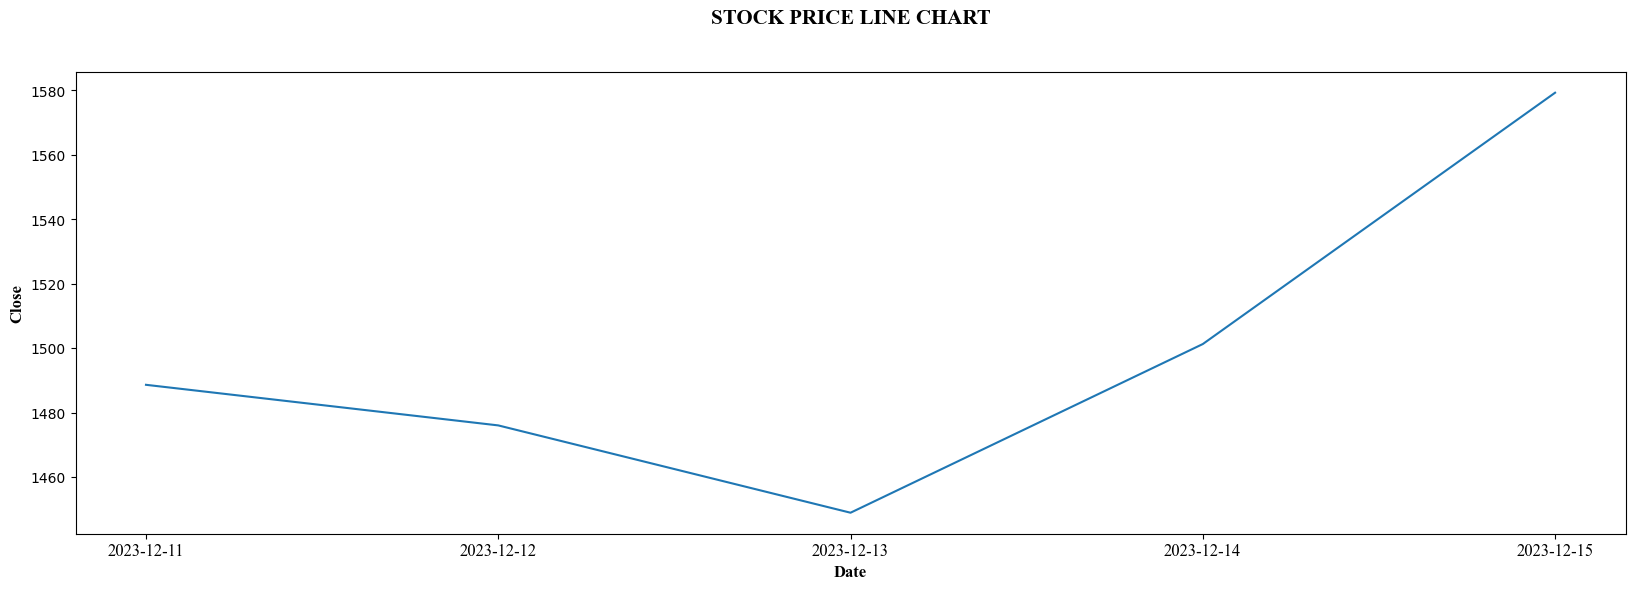

In [66]:
# Chart
plt.figure(figsize=(20,6))
sns.lineplot(x=pd.to_datetime(latest.index, format = '%Y-%m-%d %H:%M:%S%f%z').strftime('%Y-%m-%d'), y='Close', palette=['#009f6b','#FF0000'], data=latest)
plt.xticks(rotation = 0,fontsize = 12, fontfamily = "Times New Roman")
plt.xlabel("Date", weight='bold', fontfamily = "Times New Roman", size = '12')
plt.ylabel("Close", weight='bold', fontfamily = "Times New Roman", size = '12')
plt.title("STOCK PRICE LINE CHART\n\n", verticalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '15')
plt.show()

In [67]:
lstm_df.tail()

,DATE,STOCK_PRICE,Indicator
5936,11-12-2023,1488.599976,test
5937,12-12-2023,1476.000000,test
5938,13-12-2023,1436.849976,test
5940,14-12-2023,1501.250000,NaN
5941,15-12-2023,1579.250000,NaN


In [68]:
#Defining test and train data sizes
train_size = int(len(lstm_df)*0.95)
test_size = len(lstm_df) - train_size

In [69]:
for index, row in lstm_df.iterrows():
    if (index <= train_size):
        lstm_df.at[index, 'Indicator'] = 'train'
    elif (index > train_size):
        lstm_df.at[index, 'Indicator'] = 'test'
    else:
        print("ERROR HAS OCCURED\n")
lstm_df

,DATE,STOCK_PRICE,Indicator
0,03-01-2000,122.480469,train
1,04-01-2000,132.110931,train
2,05-01-2000,121.542191,train
3,06-01-2000,111.819138,train
4,07-01-2000,102.873825,train
...,...,...,...
5936,11-12-2023,1488.599976,test
5937,12-12-2023,1476.000000,test
5938,13-12-2023,1436.849976,test
5940,14-12-2023,1501.250000,test


In [70]:
lstm_df = lstm_df[["DATE", "STOCK_PRICE"]]
# lstm_df['DATE'] = pd.to_datetime(lstm_df['DATE'], format = '%Y-%m-%d')
lstm_df['DATE'] = pd.to_datetime(lstm_df['DATE'], format = '%d-%m-%Y')
train_size = int(len(lstm_df)*0.95)
test_size = len(lstm_df) - train_size
lstm_df

,DATE,STOCK_PRICE
0,2000-01-03,122.480469
1,2000-01-04,132.110931
2,2000-01-05,121.542191
3,2000-01-06,111.819138
4,2000-01-07,102.873825
...,...,...
5936,2023-12-11,1488.599976
5937,2023-12-12,1476.000000
5938,2023-12-13,1436.849976
5940,2023-12-14,1501.250000


In [71]:
import pickle
lstm_model = pickle.load(open('lstm_model.pkl','rb'))
lstm_model.compile(loss='mean_squared_error',optimizer='adam')

In [72]:
sdata_sc = pd.DataFrame()
sdata_sc[['STOCK_PRICE']] = scaler.fit_transform(lstm_df[['STOCK_PRICE']])
ds_scaled = sdata_sc[['STOCK_PRICE']].values

In [73]:
get_100_days = sdata_sc.STOCK_PRICE.tail(100).values
fut_inp = get_100_days
tmp_inp = list(fut_inp)

In [74]:
# Predicting next duration (configurable) days price using the current data
# It will predict in sliding window manner (algorithm) with stride 1

duration = 10
lst_output=[]
n_steps=100
i=0
while(i<duration):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = lstm_model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = lstm_model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.793542206287384], [0.77381831407547], [0.7603018879890442], [0.7501371502876282], [0.7412289381027222], [0.7326200008392334], [0.7240759134292603], [0.7157495617866516], [0.7079408168792725], [0.7009491324424744]]


In [75]:
lst_output

[[0.793542206287384],
 [0.77381831407547],
 [0.7603018879890442],
 [0.7501371502876282],
 [0.7412289381027222],
 [0.7326200008392334],
 [0.7240759134292603],
 [0.7157495617866516],
 [0.7079408168792725],
 [0.7009491324424744]]

In [76]:
forecast_list = scaler.inverse_transform(lst_output).reshape(duration)
forecast_list

array([1546.0459486 , 1508.47174952, 1482.72283144, 1463.35891108,
       1446.38868358, 1429.9885776 , 1413.71201119, 1397.85023346,
       1382.9745014 , 1369.65527718])

In [77]:
import datetime
final_stock_data = lstm_df.copy()
final_stock_data['DATE'] = pd.to_datetime(final_stock_data['DATE'], format = '%Y-%m-%d')

In [78]:
import datetime
new_forecast = pd.DataFrame(columns=final_stock_data.columns)
new_forecast['STOCK_PRICE'] = forecast_list
new_forecast['Indicator'] = 'forecasted'

# Getting the last row date from 'DATE' column, which can be used to get the start_date and end_date
last_row_date = final_stock_data.DATE.iloc[-1] 
last_row_date = pd.to_datetime(last_row_date, format = '%Y-%m-%d') # Last date of the data frame in formatted
start_date = last_row_date + datetime.timedelta(days=1)

# Adding duration number of days
end_date = start_date + datetime.timedelta(days=duration)

# Adding the new dates to the dataframe new_forecast
new_forecast['DATE']= pd.DataFrame(pd.date_range(start=start_date, end=end_date), columns=['DATE'])
new_forecast

,DATE,STOCK_PRICE,Indicator
0,2023-12-16,1546.045949,forecasted
1,2023-12-17,1508.471750,forecasted
2,2023-12-18,1482.722831,forecasted
3,2023-12-19,1463.358911,forecasted
4,2023-12-20,1446.388684,forecasted
5,2023-12-21,1429.988578,forecasted
6,2023-12-22,1413.712011,forecasted
7,2023-12-23,1397.850233,forecasted
8,2023-12-24,1382.974501,forecasted
9,2023-12-25,1369.655277,forecasted


In [79]:
start_date = '2023-12-14'
end_date = '2023-12-15'
sdate = pd.to_datetime(start_date, format = '%Y-%m-%d')
edate = pd.to_datetime(end_date, format = '%Y-%m-%d')


#filtered_df = final_stock_data.loc[(final_stock_data.index >= sdate) & (final_stock_data.index < edate)]
filtered_df = final_stock_data[final_stock_data['DATE'].dt.strftime(
    '%Y-%m-%d').between(start_date, end_date)]
filtered_df

after_start_date = final_stock_data["DATE"] >= start_date
before_end_date = final_stock_data["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date

# Using pandas.DataFrame.loc to Filter Rows by Dates
filtered_df = final_stock_data.loc[between_two_dates]
filtered_df

,DATE,STOCK_PRICE
5940,2023-12-14,1501.25
5941,2023-12-15,1579.25


In [80]:
# start_date = '2023-12-14'
# end_date = '2023-12-15'
# sdate = pd.to_datetime(start_date, format = '%Y-%m-%d')
# edate = pd.to_datetime(end_date, format = '%Y-%m-%d')
# filtered_df = final_stock_data.loc[(final_stock_data.index >= sdate) & (final_stock_data.index < edate)]
# #filtered_df = final_stock_data[final_stock_data['DATE'].dt.strftime('%Y-%m-%d').between(sdate, edate)]
# filtered_df

In [81]:
df = final_stock_data.copy()
start_date = '2023-12-14'
end_date = '2023-12-19'
sdate = pd.to_datetime(start_date, format = '%Y-%m-%d')
edate = pd.to_datetime(end_date, format = '%Y-%m-%d')

filtered_df = final_stock_data[(final_stock_data['DATE'] > sdate) & (final_stock_data['DATE'] < edate)]
filtered_df



,DATE,STOCK_PRICE
5941,2023-12-15,1579.25


In [82]:
for index, row in lstm_df.iterrows():
    if (index <= len(lstm_df)):
        lstm_df.at[index, 'Indicator'] = 'actual'
lstm_df

# test_data, train_data = st_data[st_data["Indicator"].eq("test")], st_data[st_data["Indicator"].eq("train")] # The command to extract test and train data based on the 'indicator' column

,DATE,STOCK_PRICE,Indicator
0,2000-01-03,122.480469,actual
1,2000-01-04,132.110931,actual
2,2000-01-05,121.542191,actual
3,2000-01-06,111.819138,actual
4,2000-01-07,102.873825,actual
...,...,...,...
5936,2023-12-11,1488.599976,actual
5937,2023-12-12,1476.000000,actual
5938,2023-12-13,1436.849976,actual
5940,2023-12-14,1501.250000,actual


In [83]:
frames = [lstm_df, new_forecast]
final_stock_data = pd.concat(frames)
# final_stock_data.set_index('DATE',inplace=True)
final_stock_data

,DATE,STOCK_PRICE,Indicator
0,2000-01-03,122.480469,actual
1,2000-01-04,132.110931,actual
2,2000-01-05,121.542191,actual
3,2000-01-06,111.819138,actual
4,2000-01-07,102.873825,actual
...,...,...,...
5,2023-12-21,1429.988578,forecasted
6,2023-12-22,1413.712011,forecasted
7,2023-12-23,1397.850233,forecasted
8,2023-12-24,1382.974501,forecasted


In [84]:
#Creating final data for plotting
ds_new = ds_scaled.tolist()
final_graph = scaler.inverse_transform(ds_new).tolist()

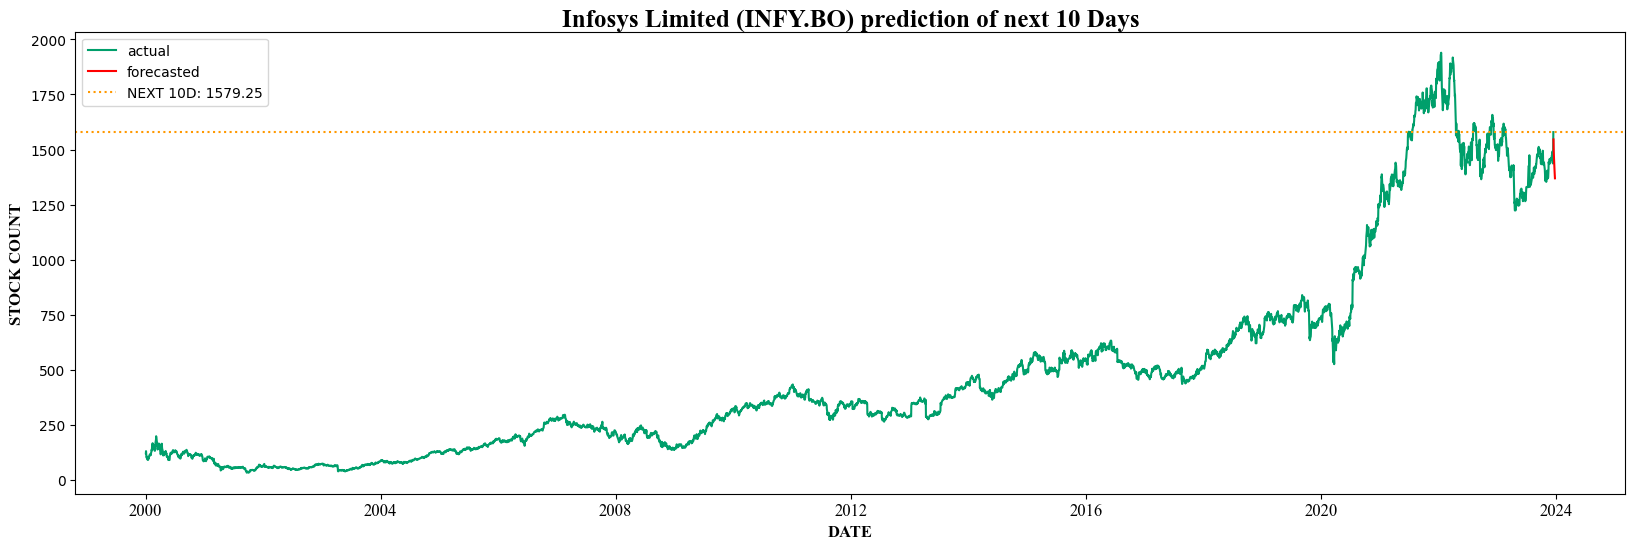

In [86]:
stock_symbol = "Infosys Limited (INFY.BO)"
plt.figure(figsize=(20,6))
sns.lineplot(x='DATE', y='STOCK_PRICE', hue='Indicator', palette=['#009f6b','#FF0000'], data=final_stock_data)
plt.xticks(rotation = 0,fontsize = 12, fontfamily = "Times New Roman")
plt.xlabel("DATE", weight='bold', fontfamily = "Times New Roman", size = '12')
plt.ylabel("STOCK COUNT", weight='bold', fontfamily = "Times New Roman", size = '12')
plt.title(f"{stock_symbol} prediction of next {duration} Days", verticalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '18')
plt.axhline(y=final_graph[len(final_graph)-1], color = '#ff9900', linestyle = ':', label = f'NEXT {duration}D: {round(float(*final_graph[len(final_graph)-1]),2)}')
plt.legend()
plt.show()